## Finite Difference For Elliptic Problems

Here we show how to solve the following elliptic ordinary differential equation:
$$\begin{cases}u'' = 0\\u(0)=0\;\;u(2)=2\end{cases}$$

using a finite difference scheme.

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *

We first define the geometry of the problem and create a mesh of uniform size 0.01,

In [2]:
I = line(0.0,2.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.4)

In [3]:
mesh

|1D Mesh|
Mesh made by 5.
0. [0.000000,0.400000]
1. [0.400000,0.800000]
2. [0.800000,1.200000]
3. [1.200000,1.600000]
4. [1.600000,2.000000]

In [4]:
mesh.getElNumber()

5

then define a mesh function that defines the boundary condition.

In [5]:
def nullf(P):
    return [0];
u0 = MeshFunction(mesh,1)
u0.pushFunction(nullf)

In [6]:
u0_vec = u0.vec_export()
u0_vec

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)

(0.000000,0.000000,0.000000,0.000000,0.000000,2.000000)


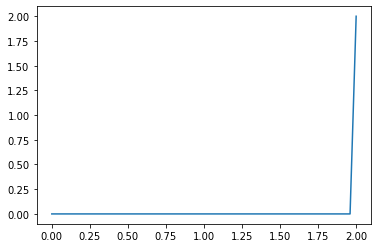

In [7]:
v0 = vec(u0_vec.len())
v0[1]=0.0;
v0[v0.len()]=2.0;
print(v0)
u0.vec_import(v0);
Draw(u0,mesh,0)

We now define the source term create some boundary condition with the mesh function previously generated:

In [8]:
f = MeshFunction(mesh,1)
f.pushFunction(lambda p: [0])
f_vec = f.vec_export()
f_vec

(0.000000,0.000000,0.000000,0.000000,0.000000,0.000000)

In [9]:
bc = BoundaryCondition("DIRICHLET",u0)
fbc = bc.apply(f_vec);
fbc

(0.000000,0.000000,0.000000,0.000000,0.000000,2.000000)

Last we define the finite difference scheme on the given mesh, and solve the problem:
$$A\vec{u} = \vec{f}$$

using Gauss-Seidel method.

In [10]:
FD = FiniteDifference(mesh)

In [11]:
M = FD.LaplaceOp(bc);
M

[0,(1,1)]->1.000000
[6,(2,1)]->6.250000
[7,(2,2)]->-12.500000
[8,(2,3)]->6.250000
[13,(3,2)]->6.250000
[14,(3,3)]->-12.500000
[15,(3,4)]->6.250000
[20,(4,3)]->6.250000
[21,(4,4)]->-12.500000
[22,(4,5)]->6.250000
[27,(5,4)]->6.250000
[28,(5,5)]->-12.500000
[29,(5,6)]->6.250000
[35,(6,6)]->1.000000

In [17]:
u_vec = GauBSeidel(M,fbc,v0,2000)
print(u_vec)
u = MeshFunction(mesh,1)
u.pushFunction(lambda p: [0])
u.vec_import(u_vec)

(-0.000000,0.400000,0.800000,1.200000,1.600000,2.000000)


In [13]:
print(u_vec)
u.eval([0.1],1)

(0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2.000000)


[0.0]

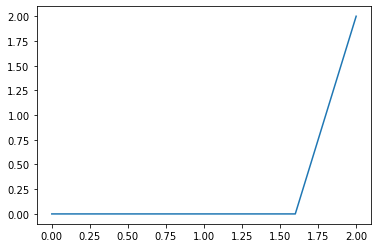

In [14]:
Draw(u,mesh,1)

(0.000000,0.400000,0.800000,1.200000,1.600000,2.000000)


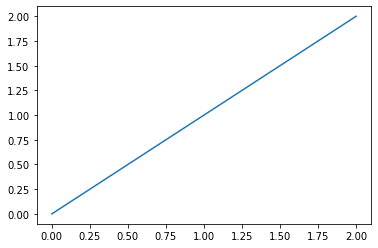

In [15]:
ue = MeshFunction(mesh,1);
ue.pushFunction(lambda p: [p[0]]);
print(ue.vec_export())
ue.eval([1.9],1)
Draw(ue,mesh,1)